In [8]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors
import numpy as np
import os
%matplotlib inline

In [9]:
def get_lengths(gtf):
    df = pd.read_csv(gtf, sep="\t", header=None,names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])
    return list([i for i in df["end"] - df["start"] if not i == 0])

In [10]:
gtfs = ['phased-vcf/' + i for i in os.listdir('phased-vcf') if i.endswith('.gtf')]
names = [int(i.split('/')[-1].split('-')[1].split('_')[0]) for i in gtfs]
blocks = [get_lengths(g) for g in gtfs]
res = {n: b for n, b in zip(names, blocks)}

In [32]:
df = pd.read_csv("Homo_sapiens.GRCh38.95.gtf.gz", sep="\t", header=None,names=['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'], comment='#')
transcripts = df[df["feature"] == 'transcript']
res['gene annotation'] = [i for i in transcripts["end"] - transcripts["start"] if not i == 0]

[Text(0.0, 0, '1'),
 Text(2.0, 0, '100'),
 Text(4.0, 0, '10000'),
 Text(6.0, 0, '1000000'),
 Text(8.0, 0, '100000000')]

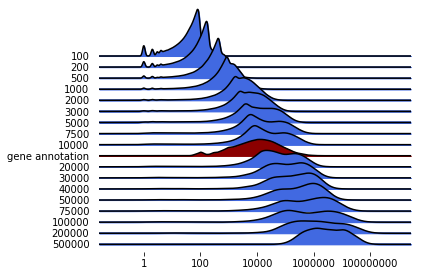

In [33]:
fig, ax = joypy.joyplot({k: np.log10(res[k])
                         for k in [100,200,500,1000,2000,3000,5000,7500,10000, 'gene annotation', 20000, 30000, 40000, 50000,75000,100000,200000,500000 ]},
                    colormap=matplotlib.colors.ListedColormap(["royalblue"] * 9 + ["darkred"] + ["royalblue"]*8, name='from_list', N=None))
xticks = [int(i.get_text()) for i in ax[-1].get_xticklabels()]
ax[-1].set_xticklabels([10**i for i in xticks])